# Feature Detection and Matching

In [2]:
import cv2 as cv
import numpy as np
import requests
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

## Image import

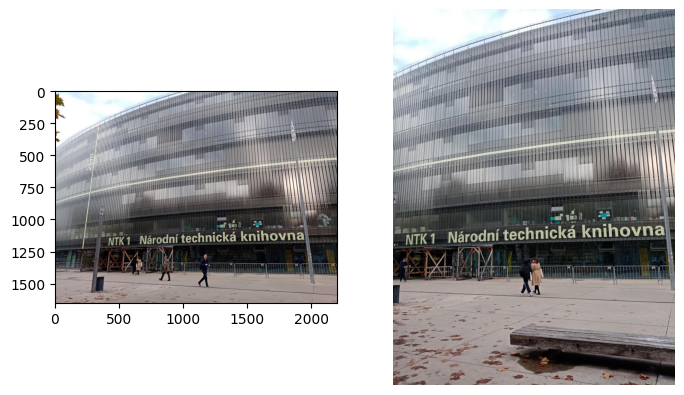

In [24]:
# Image URL
url = "https://d48-a.sdn.cz/d_48/c_img_QI_s/dAsCK9.jpeg?fl=res,2200,2200,1"
resp = requests.get(url)
img_array = np.frombuffer(resp.content, np.uint8)
img = cv.imdecode(img_array, cv.IMREAD_COLOR)
img1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

url = "https://d48-a.sdn.cz/d_48/c_img_gX_q/QMRGQB.jpeg?fl=res,2200,2200,1"
resp = requests.get(url)
img_array = np.frombuffer(resp.content, np.uint8)
img = cv.imdecode(img_array, cv.IMREAD_COLOR)
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)
plt.axis("off")
plt.show()

## Harris corner detector

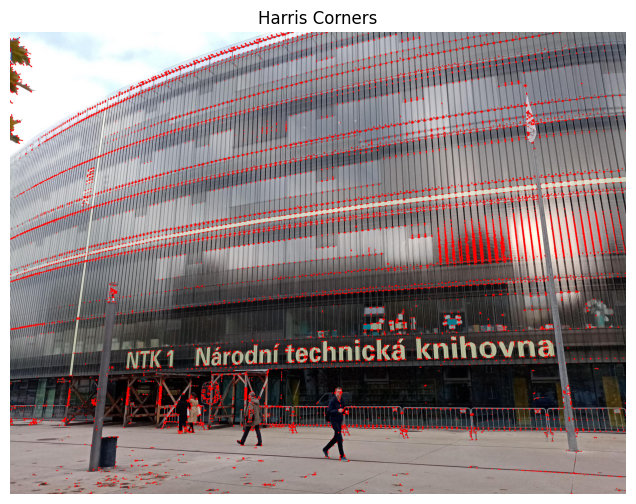

In [12]:
# Convert to grayscale
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Apply Harris corner detector
dst = cv.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

# Dilate to mark the corners more clearly
dst = cv.dilate(dst, None)

# Threshold for an optimal value, marking corners in red
img_harris = img1.copy()
img_harris[dst > 0.01 * dst.max()] = [255, 0, 0]  # red corners

# Show result
plt.figure(figsize=(8,6))
plt.imshow(img_harris)
plt.axis("off")
plt.title("Harris Corners")
plt.show()

## Interactive version


In [14]:
# Convert to grayscale float
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

def harris_demo(blockSize=2, ksize=3, k=4, thresh=1):
    # Harris corner detection
    dst = cv.cornerHarris(src=gray, blockSize=blockSize, ksize=ksize, k=k/100.0)
    dst = cv.dilate(dst, None)

    # Copy image and mark corners
    img_harris = img1.copy()
    img_harris[dst > (thresh/100.0) * dst.max()] = [255, 0, 0]

    # Display
    plt.figure(figsize=(8,6))
    plt.imshow(img_harris)
    plt.axis("off")
    plt.title(f"Harris Corners (blockSize={blockSize}, ksize={ksize}, k={k/100.0}, thresh={thresh}%)")
    plt.show()

# Interactive sliders
interact(
    harris_demo,
    blockSize=widgets.IntSlider(value=2, min=2, max=10, step=1, description="blockSize"),
    ksize=widgets.IntSlider(value=3, min=3, max=15, step=2, description="ksize"), # must be odd
    k=widgets.IntSlider(value=4, min=1, max=20, step=1, description="k*100"),
    thresh=widgets.IntSlider(value=1, min=1, max=10, step=1, description="thresh %")
);

interactive(children=(IntSlider(value=2, description='blockSize', max=10, min=2), IntSlider(value=3, descripti…

# ORB detector, feature matching

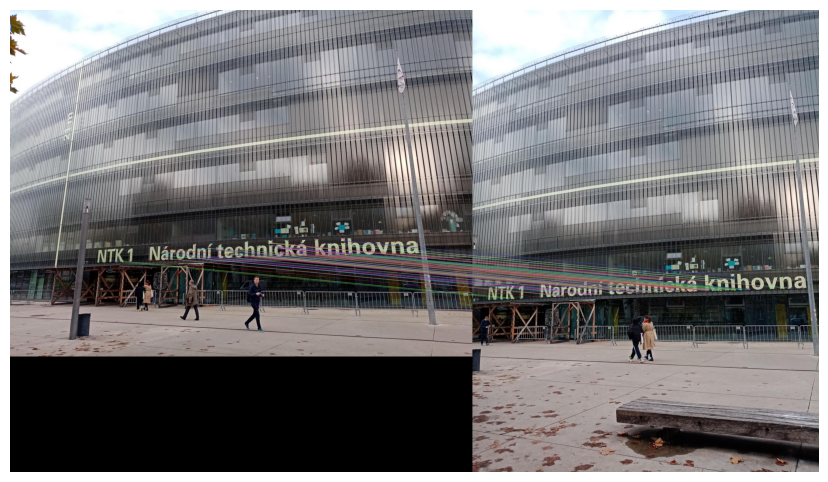

In [19]:
# Create detector (ORB is free & fast; SIFT also works if available)
orb = cv.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Match descriptors
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 20 matches
matched_img = cv.drawMatches(img1, kp1, img2, kp2, matches[:100], None)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.imshow(matched_img)
plt.axis("off")
plt.show()

## SIFT detection, feature matching

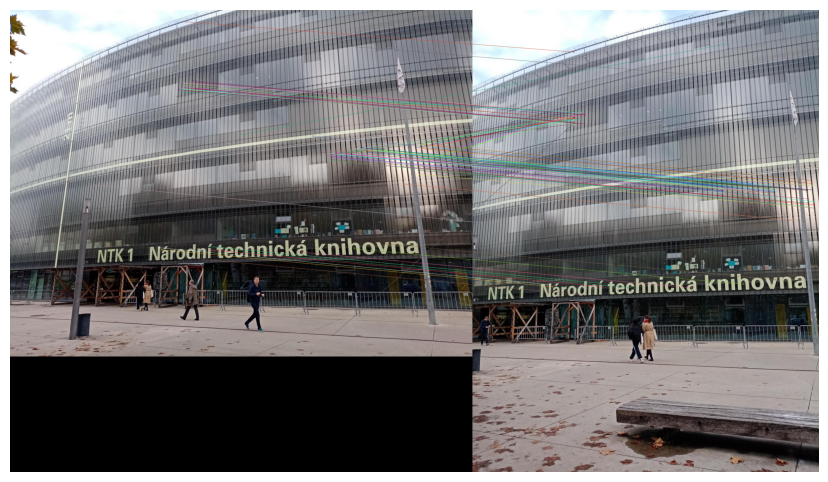

In [21]:
# --- Create detector (SIFT) ---
sift = cv.SIFT_create()

# --- Detect keypoints and descriptors ---
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# --- Match descriptors (use L2 norm for SIFT) ---
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# --- Sort by distance (smaller = better) ---
matches = sorted(matches, key=lambda x: x.distance)

# --- Draw first 20 matches ---
matched_img = cv.drawMatches(img1, kp1, img2, kp2, matches[:100], None, flags=2)

# --- Display ---
plt.figure(figsize=(12,6))
plt.imshow(matched_img)
plt.axis("off")
plt.show()